__Aram Adamyan__

# My Project has 4 models for Wine Qaulity prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


from sklearn import metrics
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Understanding and Cleaning Data

In [2]:
df = pd.read_csv("winequalityN.csv") #reading data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Droping Duplicate rows and Null values**

In [3]:
df.drop_duplicates(inplace=True)     # droping duplicate rows
df =df.reset_index(drop=True)       # reseting the index number
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
5324    red            6.8             0.620         0.08             1.9   
5325    red            6.2             0.600         0.08             2.0   
5326    red            5.9             0.550         0.10             2.2   
5327    red            5.9             0.645         0.12             2.0   
5328    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
5324      0.068                 28.0                  38.0  0.99651  3.42   
5325      0.090                 32.0                  44.0  0.99490  3.45   
5326      0.062                 39.0                  51.0  0.99512  3.52   
5327      0.075                 32.0                  44.0  0.99547  3.57   
5328      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.47      9.6        6  
...         ...      ...      ...  
5324       0.82      9.5        6  
5325       0.58     10.5        5  
5326        NaN     11.2        6  
5327       0.71     10.2        5  
5328       0.66     11.0        6  

[5329 rows x 13 columns]

In [4]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5319.000000       5321.000000  5326.000000     5327.000000   
mean        7.216573          0.344123     0.318738        5.053839   
std         1.319194          0.168228     0.147116        4.504005   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5327.000000          5329.000000           5329.000000  5329.000000   
mean      0.056668            30.060143            114.189341     0.994536   
std       0.036845            17.815588             56.781422     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             75.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994640   
75%       0.066000            41.000000            154.000000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5320.000000  5325.000000  5329.000000  5329.000000  
mean      3.224434     0.533268    10.548539     5.796022  
std       0.160275     0.149724     1.186134     0.879922  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df.dropna(inplace=True)
df =df.reset_index(drop=True) 
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
5290    red            6.3             0.510         0.13             2.3   
5291    red            6.8             0.620         0.08             1.9   
5292    red            6.2             0.600         0.08             2.0   
5293    red            5.9             0.645         0.12             2.0   
5294    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
5290      0.076                 29.0                  40.0  0.99574  3.42   
5291      0.068                 28.0                  38.0  0.99651  3.42   
5292      0.090                 32.0                  44.0  0.99490  3.45   
5293      0.075                 32.0                  44.0  0.99547  3.57   
5294      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.47      9.6        6  
...         ...      ...      ...  
5290       0.75     11.0        6  
5291       0.82      9.5        6  
5292       0.58     10.5        5  
5293       0.71     10.2        5  
5294       0.66     11.0        6  

[5295 rows x 13 columns]

# Exploring Data

In [7]:
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
5290    red            6.3             0.510         0.13             2.3   
5291    red            6.8             0.620         0.08             1.9   
5292    red            6.2             0.600         0.08             2.0   
5293    red            5.9             0.645         0.12             2.0   
5294    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
5290      0.076                 29.0                  40.0  0.99574  3.42   
5291      0.068                 28.0                  38.0  0.99651  3.42   
5292      0.090                 32.0                  44.0  0.99490  3.45   
5293      0.075                 32.0                  44.0  0.99547  3.57   
5294      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.47      9.6        6  
...         ...      ...      ...  
5290       0.75     11.0        6  
5291       0.82      9.5        6  
5292       0.58     10.5        5  
5293       0.71     10.2        5  
5294       0.66     11.0        6  

[5295 rows x 13 columns]

In [8]:
df.quality.value_counts().sort_index()

3      30
4     204
5    1745
6    2311
7     852
8     148
9       5
Name: quality, dtype: int64

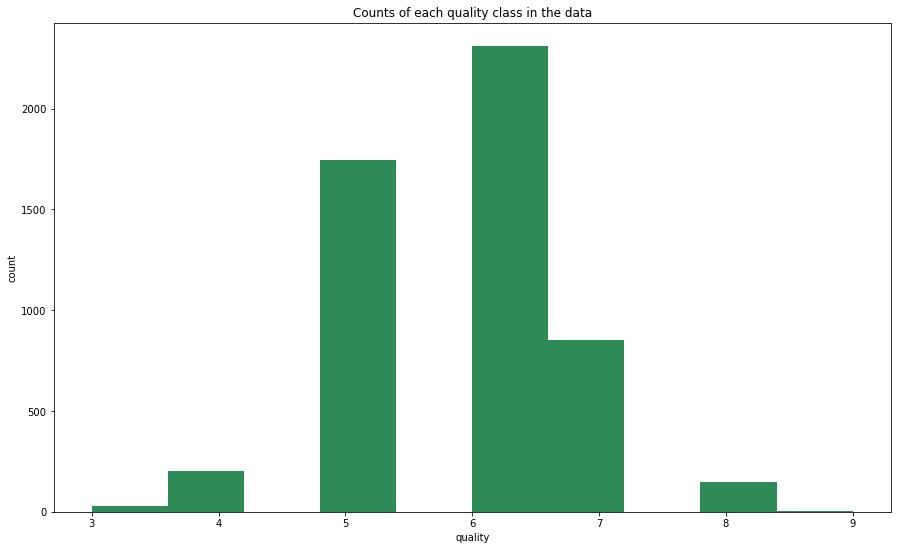

In [9]:
plt.figure(figsize = (15,9))
plt.hist(df.quality, color = 'seagreen')
plt.ylabel("count")
plt.xlabel("quality")
plt.title("Counts of each quality class in the data")
plt.show()

In [10]:
corr = df.corr()
fig = px.imshow(corr,labels=dict(x="columns", color="corrolation"),width=1000, height=900,  title="Corrolation table of each column")
fig.update_xaxes(side="top")
fig.show()

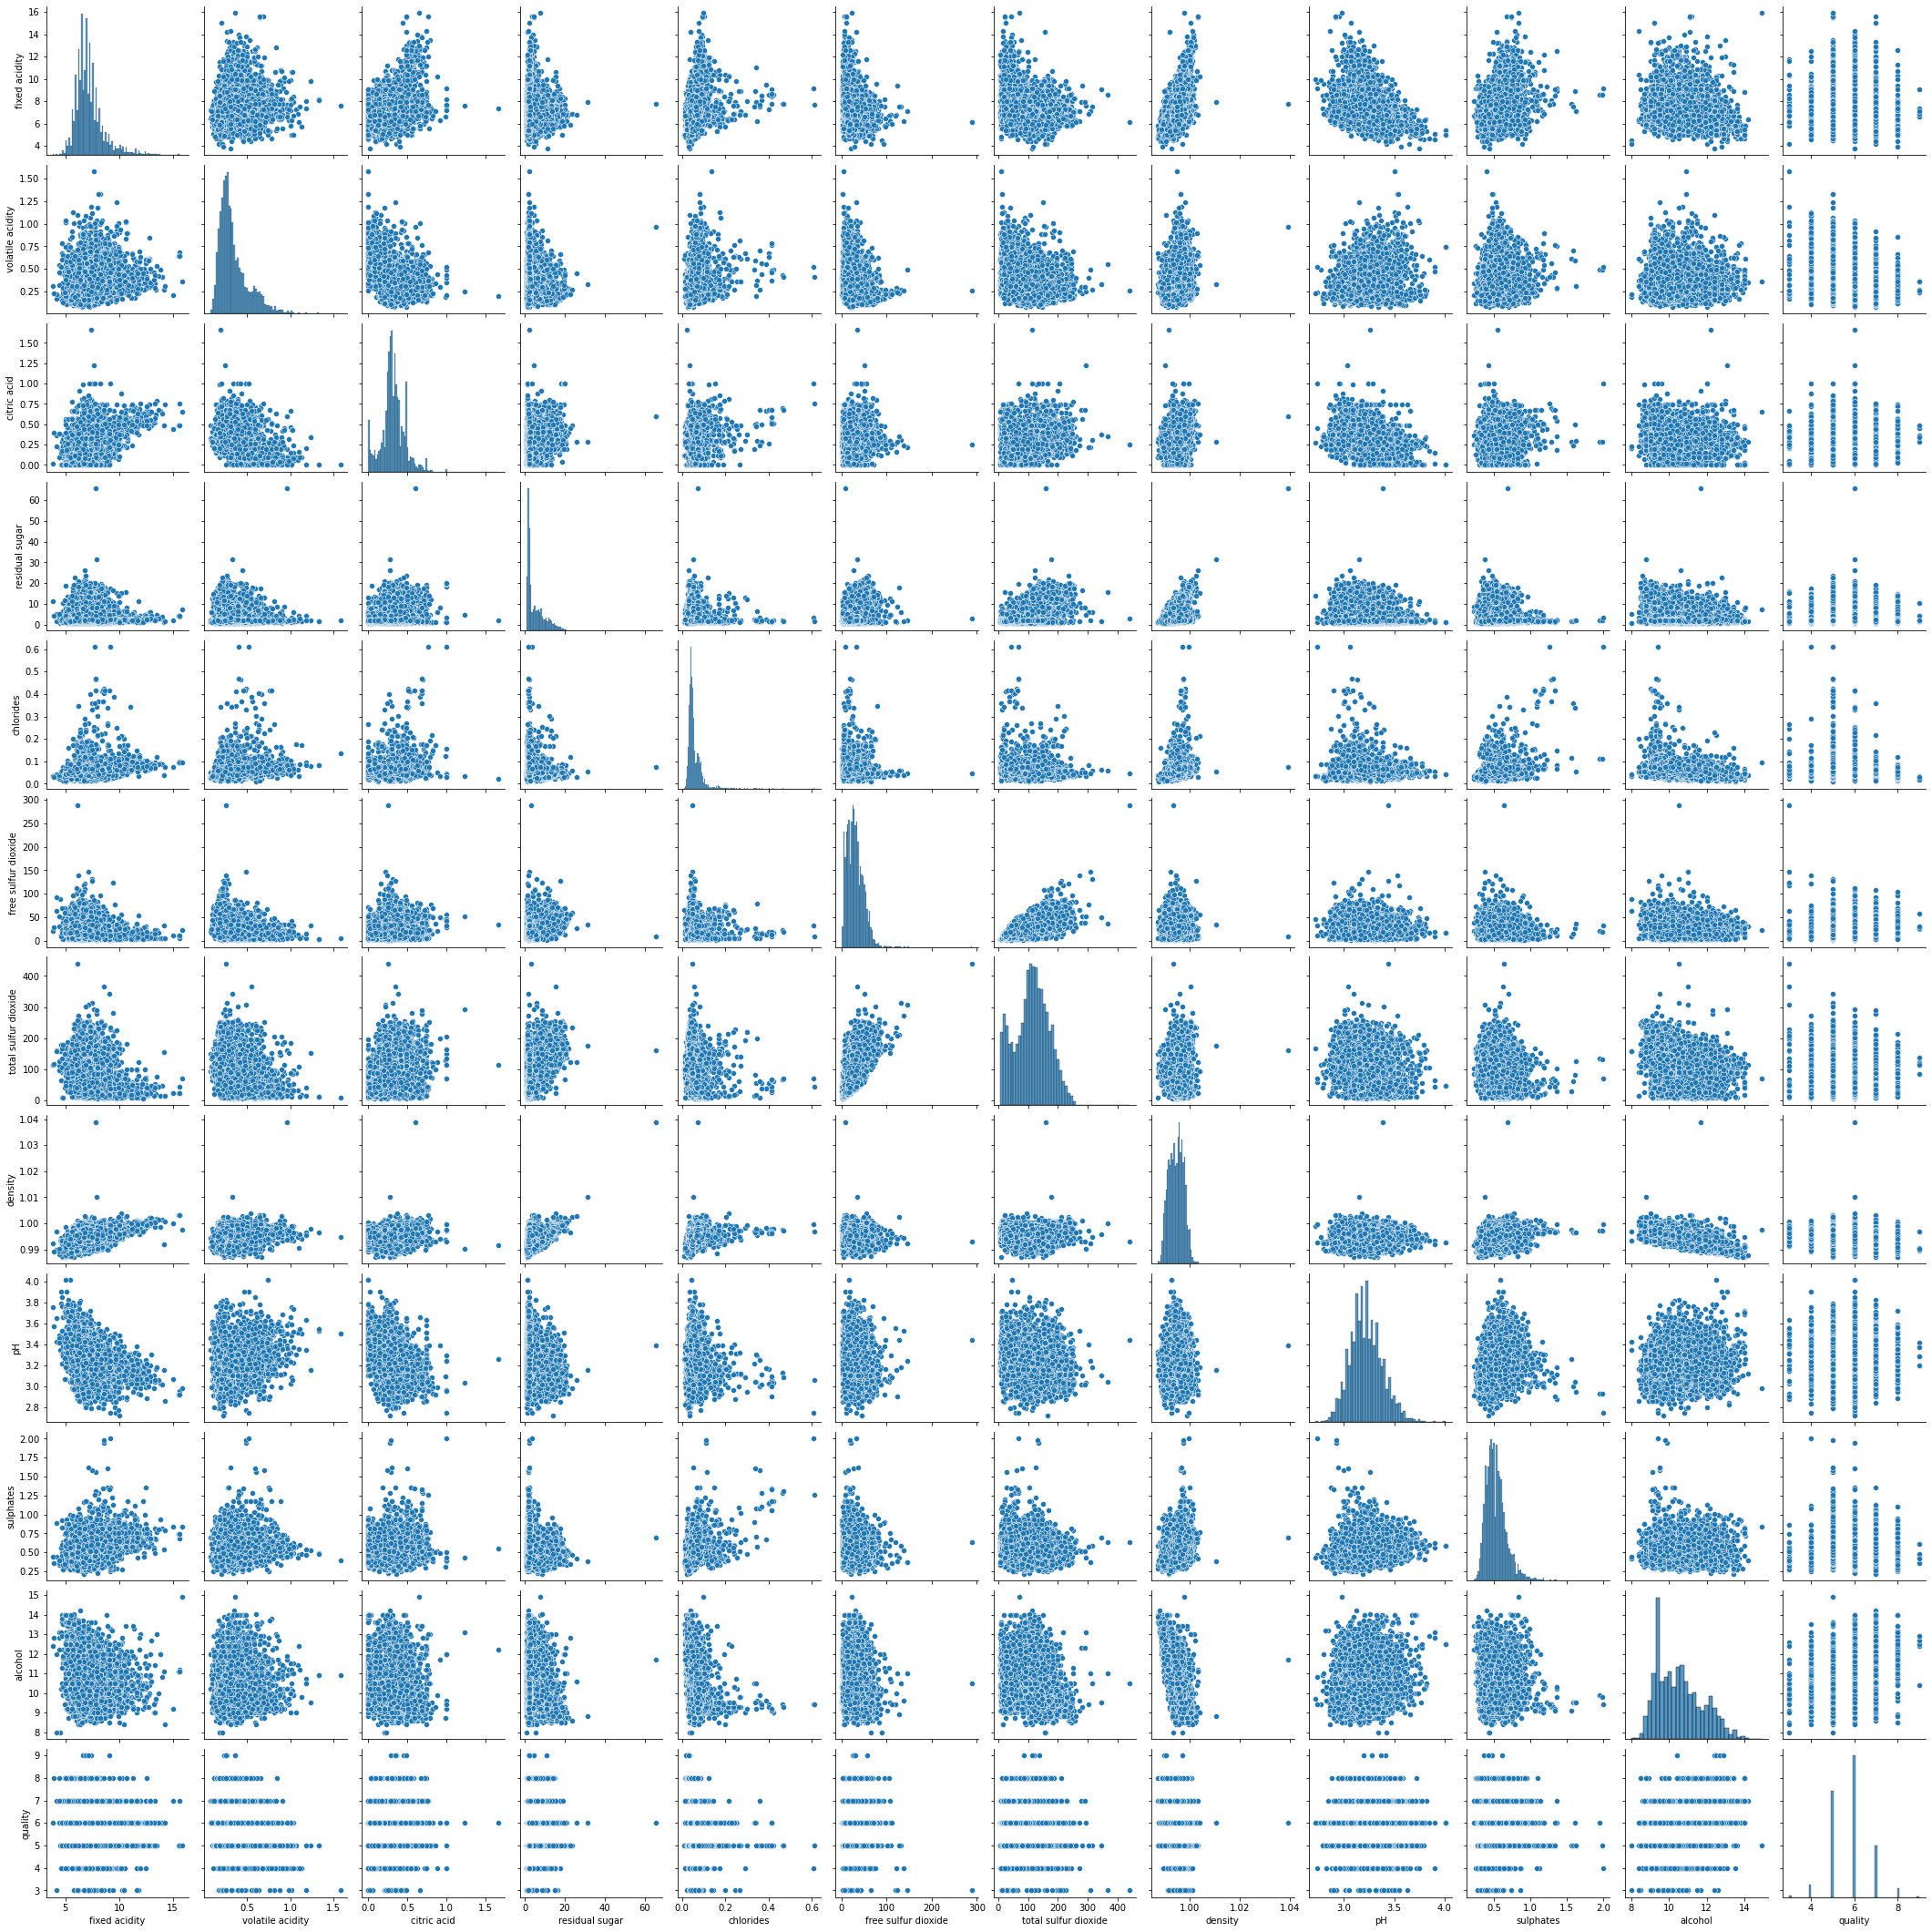

In [11]:
sns.pairplot(df)
plt.show()

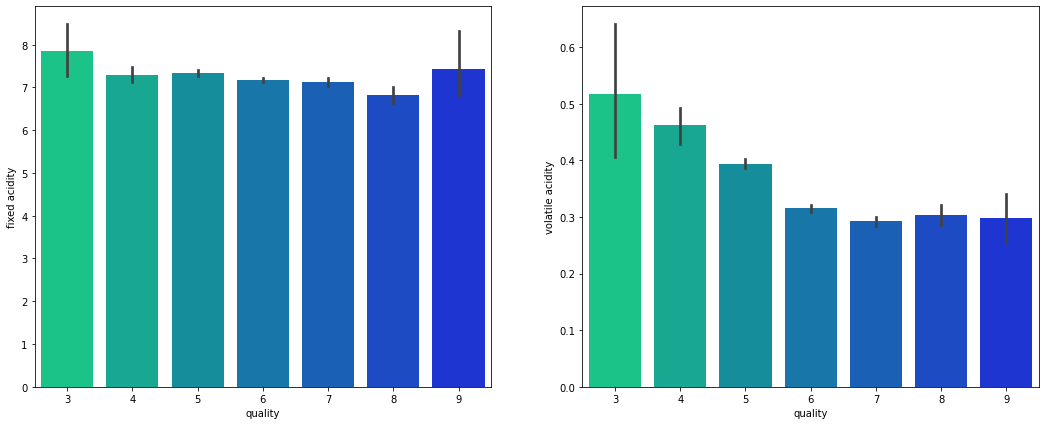

In [12]:
#In the first plot we see that fixed acidity does not give any specification to classify the quality.
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
sns.barplot(x = 'quality', y = 'fixed acidity', data  =df, palette="winter_r")

#In the second plot we see that its quite a downing trend in the volatile acidity as we go higher the quality 
plt.subplot(1,2,2)
sns.barplot(x = 'quality', y = 'volatile acidity', data =df, palette="winter_r")
plt.show()

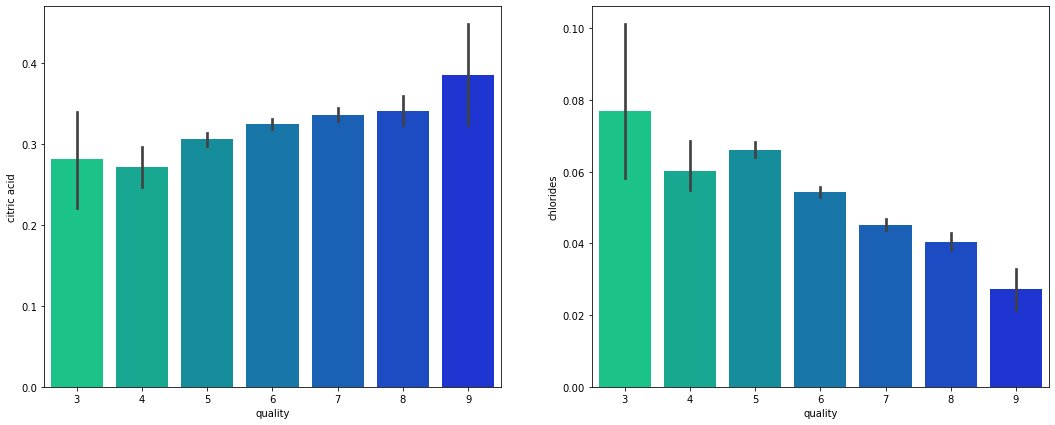

In [13]:
#In the 1st plot Composition of citric acid gets higher as we increase in the quality of the wine
fig = plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
sns.barplot(x = 'quality', y = 'citric acid', data =df, palette="winter_r")


#In the 2nd plot Composition of chloride also go down as we go higher in the quality of the wine
plt.subplot(1,2,2)
sns.barplot(x = 'quality', y = 'chlorides', data =df, palette="winter_r")
plt.show()

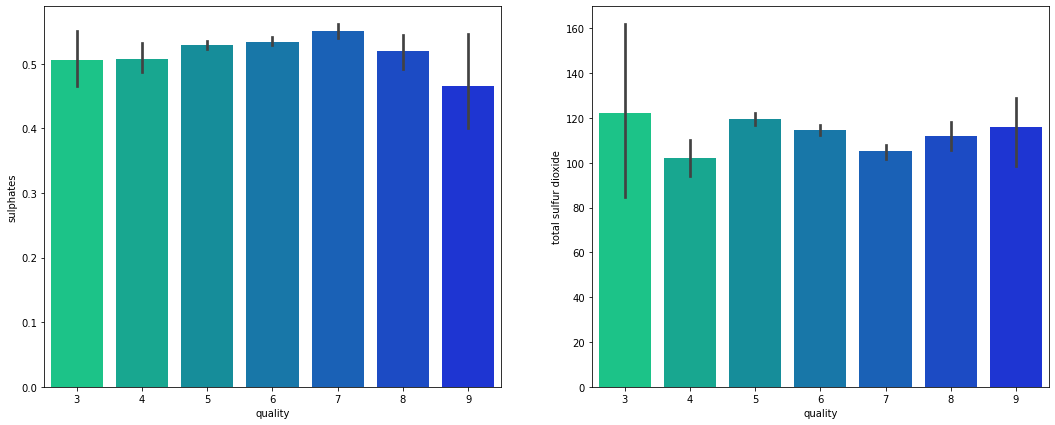

In [14]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
sns.barplot(x = 'quality', y = 'sulphates', data =df, palette="winter_r")

#Sulfur dioxide levels dont really give us a good understanding of the quality of wine
plt.subplot(1,2,2)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df,palette="winter_r")
plt.show()

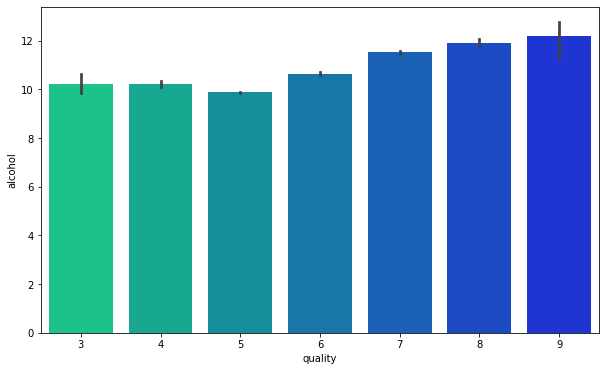

In [15]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df,palette="winter_r")
plt.show()

# Data preprocessing for the model

### One Hot encoding

In [16]:
df =pd.concat([pd.get_dummies(df.type), df], axis=1)
df

red  white   type  fixed acidity  volatile acidity  citric acid  \
0       0      1  white            7.0             0.270         0.36   
1       0      1  white            6.3             0.300         0.34   
2       0      1  white            8.1             0.280         0.40   
3       0      1  white            7.2             0.230         0.32   
4       0      1  white            6.2             0.320         0.16   
...   ...    ...    ...            ...               ...          ...   
5290    1      0    red            6.3             0.510         0.13   
5291    1      0    red            6.8             0.620         0.08   
5292    1      0    red            6.2             0.600         0.08   
5293    1      0    red            5.9             0.645         0.12   
5294    1      0    red            6.0             0.310         0.47   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0               20.7      0.045                 45.0                 170.0   
1                1.6      0.049                 14.0                 132.0   
2                6.9      0.050                 30.0                  97.0   
3                8.5      0.058                 47.0                 186.0   
4                7.0      0.045                 30.0                 136.0   
...              ...        ...                  ...                   ...   
5290             2.3      0.076                 29.0                  40.0   
5291             1.9      0.068                 28.0                  38.0   
5292             2.0      0.090                 32.0                  44.0   
5293             2.0      0.075                 32.0                  44.0   
5294             3.6      0.067                 18.0                  42.0   

      density    pH  sulphates  alcohol  quality  
0     1.00100  3.00       0.45      8.8        6  
1     0.99400  3.30       0.49      9.5        6  
2     0.99510  3.26       0.44     10.1        6  
3     0.99560  3.19       0.40      9.9        6  
4     0.99490  3.18       0.47      9.6        6  
...       ...   ...        ...      ...      ...  
5290  0.99574  3.42       0.75     11.0        6  
5291  0.99651  3.42       0.82      9.5        6  
5292  0.99490  3.45       0.58     10.5        5  
5293  0.99547  3.57       0.71     10.2        5  
5294  0.99549  3.39       0.66     11.0        6  

[5295 rows x 15 columns]

In [17]:
df.drop("type", axis =1, inplace=True)
df

red  white  fixed acidity  volatile acidity  citric acid  \
0       0      1            7.0             0.270         0.36   
1       0      1            6.3             0.300         0.34   
2       0      1            8.1             0.280         0.40   
3       0      1            7.2             0.230         0.32   
4       0      1            6.2             0.320         0.16   
...   ...    ...            ...               ...          ...   
5290    1      0            6.3             0.510         0.13   
5291    1      0            6.8             0.620         0.08   
5292    1      0            6.2             0.600         0.08   
5293    1      0            5.9             0.645         0.12   
5294    1      0            6.0             0.310         0.47   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0               20.7      0.045                 45.0                 170.0   
1                1.6      0.049                 14.0                 132.0   
2                6.9      0.050                 30.0                  97.0   
3                8.5      0.058                 47.0                 186.0   
4                7.0      0.045                 30.0                 136.0   
...              ...        ...                  ...                   ...   
5290             2.3      0.076                 29.0                  40.0   
5291             1.9      0.068                 28.0                  38.0   
5292             2.0      0.090                 32.0                  44.0   
5293             2.0      0.075                 32.0                  44.0   
5294             3.6      0.067                 18.0                  42.0   

      density    pH  sulphates  alcohol  quality  
0     1.00100  3.00       0.45      8.8        6  
1     0.99400  3.30       0.49      9.5        6  
2     0.99510  3.26       0.44     10.1        6  
3     0.99560  3.19       0.40      9.9        6  
4     0.99490  3.18       0.47      9.6        6  
...       ...   ...        ...      ...      ...  
5290  0.99574  3.42       0.75     11.0        6  
5291  0.99651  3.42       0.82      9.5        6  
5292  0.99490  3.45       0.58     10.5        5  
5293  0.99547  3.57       0.71     10.2        5  
5294  0.99549  3.39       0.66     11.0        6  

[5295 rows x 14 columns]

#### I chose to do Random Forest as its works best for my data as I'm solving a classifier problem. I dont need any feature scaling when using this type of model. But I definetly need te devide my quality into less groups than 9 classes as its given because I dont have enough data for the wines that have very high or very low quality

In [18]:
dfr = df.copy()
dfr['quality'] = dfr.quality.apply(lambda q: 'Bad' if q <=4  else 'Good' if q <=6 else 'Excellent')

# #another way to devide edata
# dfr['quality'] = dfr.quality.apply(lambda q: 'Bad' if q <=5 else 'Good' if q ==6 else 'Excellent')
# dfr.head() 

In [19]:
quality3 = dfr.quality.value_counts()
quality3 = dfr.quality.value_counts()
quality3_df = pd.DataFrame({'Quality Level': quality3.index,'Frequency': quality3.values})
quality3_df

Quality Level  Frequency
0          Good       4056
1     Excellent       1005
2           Bad        234

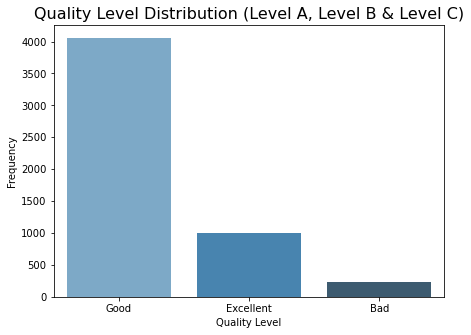

In [20]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'Quality Level', y ="Frequency", data = quality3_df,palette="Blues_d")
plt.title('Quality Level Distribution (Level A, Level B & Level C)',fontsize=16)
plt.show()

In [21]:
X = dfr.drop("quality", axis= "columns") # X columns are the independant variables
y = dfr.quality                          # y is dependant variable

# Modeling on Decision Tree with 3 Classes (Model accuracy is 77.53%)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [23]:
def get_results_multi(clf,clf_name,x_train,y_train,x_test,y_test):
    y_pred = clf.predict(x_test)
    print('Training Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_train, clf.predict(x_train))))    
    print('Test Accuracy('+clf_name+'): {:2.2%}\n'.format(accuracy_score(y_test, clf.predict(x_test))))
    print('Classification Report('+clf_name+'): \n' + classification_report(y_test, y_pred))
    
    probs = clf.predict_proba(x_test) # Predict class probabilities of the input samples 
    preds = probs[:,1]
    
    
    print('10 fold Cross Validation('+clf_name+'):')
    cv_accuracy = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print('Accuracy: {:2.2%}'.format(np.mean(cv_accuracy)))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True,cmap='Blues')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix ('+clf_name+')',fontsize=16)
    
    features = X.columns.tolist()
    tmp = pd.DataFrame({'Feature': features, 'Feature Importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature Importance',ascending=False)
    plt.figure(figsize = (10,6))
    plt.title('Features Importance',fontsize=16)
    s = sns.barplot(x='Feature',y='Feature Importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show() 
    

In [24]:
# Fit on train set
modelDT3 = DecisionTreeClassifier(random_state = 100,
                             max_depth = 4,
                             min_samples_leaf = 2,
                            )
modelDT3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=100)

Training Accuracy(Decision Tree with 3 class Classification): 79.23%
Test Accuracy(Decision Tree with 3 class Classification): 75.83%

Classification Report(Decision Tree with 3 class Classification): 
              precision    recall  f1-score   support

         Bad       0.30      0.07      0.11        45
   Excellent       0.55      0.25      0.35       217
        Good       0.79      0.93      0.85       797

    accuracy                           0.76      1059
   macro avg       0.55      0.42      0.44      1059
weighted avg       0.72      0.76      0.72      1059

10 fold Cross Validation(Decision Tree with 3 class Classification):
Accuracy: 77.53%


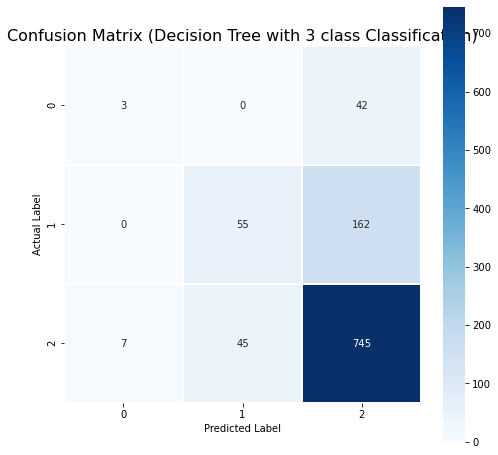

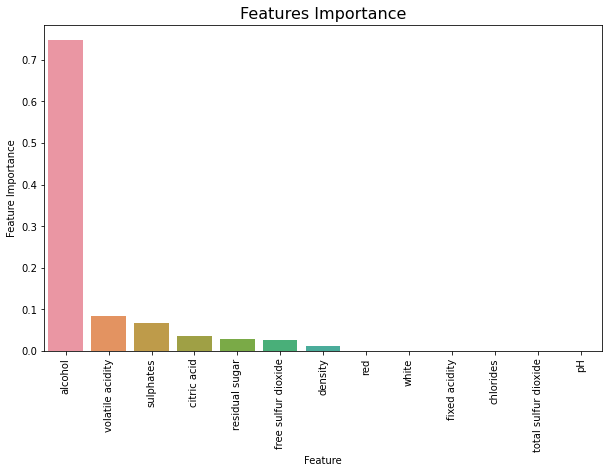

In [25]:
get_results_multi(modelDT3,'Decision Tree with 3 class Classification',X_train,y_train,X_test,y_test)

In [26]:
# # ploting a decision tree (NOT WORKING)
# def plot_decision_tree(clf,feature_name,target_name):
#     dot_data = StringIO()  
#     tree.export_graphviz(clf, out_file=dot_data,  
#                          feature_names=feature_name,  
#                          class_names=target_name,  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
#     graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#     return Image(graph.create_png())
# plot_decision_tree(modelDT3, X_train.columns, y)

# Modeling on Random Forest with 3 class (Model accuracy is 79.37%)

In [27]:
rf_clf2 = RandomForestClassifier(random_state = 42,                             
                                 min_samples_leaf = 2,
                                 max_depth=7,
                                 n_estimators = 200)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

Training Accuracy(Random Forest with 3 class Classification): 83.17%
Test Accuracy(Random Forest with 3 class Classification): 78.85%

Classification Report(Random Forest with 3 class Classification): 
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        45
   Excellent       0.71      0.29      0.42       217
        Good       0.80      0.97      0.87       797

    accuracy                           0.79      1059
   macro avg       0.50      0.42      0.43      1059
weighted avg       0.74      0.79      0.74      1059

10 fold Cross Validation(Random Forest with 3 class Classification):


C:\Users\37494\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\37494\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\37494\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 79.37%


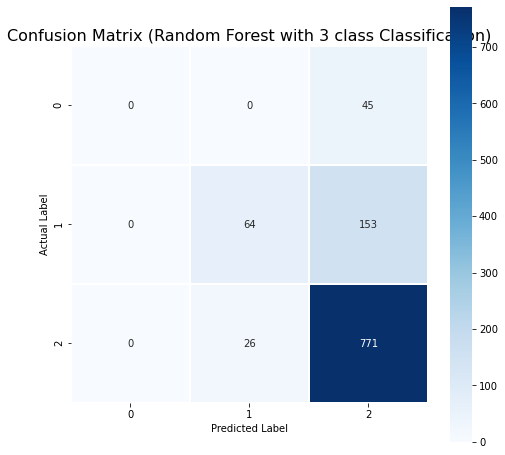

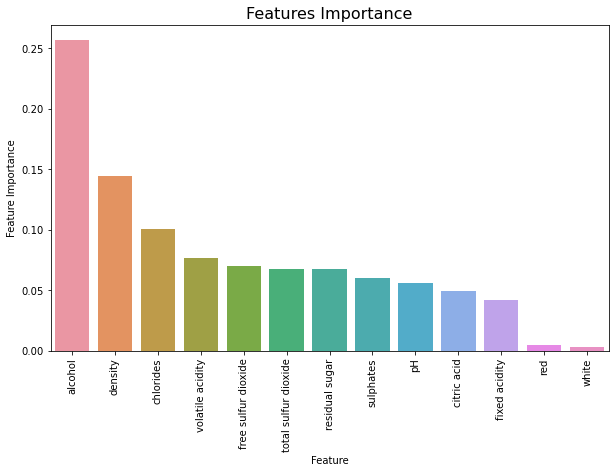

In [28]:
get_results_multi(rf_clf2,'Random Forest with 3 class Classification',X_train,y_train,X_test,y_test)

# Logistic Regression Model with 3 Classes (Model accuracy is 78%)

In [29]:
a =StandardScaler().fit(X)
b= a.transform(X)
X = pd.DataFrame(b)


In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()#.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
scores
print(round(np.mean(scores),2))

0.78


In [32]:
y_prdt = cross_val_predict(clf,X,y,cv=10)
y_prdt
print(classification_report(y, y_prdt))

              precision    recall  f1-score   support

         Bad       0.57      0.03      0.06       234
   Excellent       0.55      0.31      0.40      1005
        Good       0.81      0.94      0.87      4056

    accuracy                           0.78      5295
   macro avg       0.64      0.43      0.44      5295
weighted avg       0.75      0.78      0.74      5295



# Random Forest Binary Classification (accuracy 76.37%)

In [33]:
df

red  white  fixed acidity  volatile acidity  citric acid  \
0       0      1            7.0             0.270         0.36   
1       0      1            6.3             0.300         0.34   
2       0      1            8.1             0.280         0.40   
3       0      1            7.2             0.230         0.32   
4       0      1            6.2             0.320         0.16   
...   ...    ...            ...               ...          ...   
5290    1      0            6.3             0.510         0.13   
5291    1      0            6.8             0.620         0.08   
5292    1      0            6.2             0.600         0.08   
5293    1      0            5.9             0.645         0.12   
5294    1      0            6.0             0.310         0.47   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0               20.7      0.045                 45.0                 170.0   
1                1.6      0.049                 14.0                 132.0   
2                6.9      0.050                 30.0                  97.0   
3                8.5      0.058                 47.0                 186.0   
4                7.0      0.045                 30.0                 136.0   
...              ...        ...                  ...                   ...   
5290             2.3      0.076                 29.0                  40.0   
5291             1.9      0.068                 28.0                  38.0   
5292             2.0      0.090                 32.0                  44.0   
5293             2.0      0.075                 32.0                  44.0   
5294             3.6      0.067                 18.0                  42.0   

      density    pH  sulphates  alcohol  quality  
0     1.00100  3.00       0.45      8.8        6  
1     0.99400  3.30       0.49      9.5        6  
2     0.99510  3.26       0.44     10.1        6  
3     0.99560  3.19       0.40      9.9        6  
4     0.99490  3.18       0.47      9.6        6  
...       ...   ...        ...      ...      ...  
5290  0.99574  3.42       0.75     11.0        6  
5291  0.99651  3.42       0.82      9.5        6  
5292  0.99490  3.45       0.58     10.5        5  
5293  0.99547  3.57       0.71     10.2        5  
5294  0.99549  3.39       0.66     11.0        6  

[5295 rows x 14 columns]

In [34]:
dfb = df.copy()
dfb['quality'] = dfb.quality.apply(lambda q: 'Bad' if q <=5  else 'Good')


In [35]:
quality2 = dfb.quality.value_counts()
quality2 = dfb.quality.value_counts()
quality2_df = pd.DataFrame({'Quality Level': quality2.index,'Frequency': quality2.values})
quality2_df

Quality Level  Frequency
0          Good       3316
1           Bad       1979

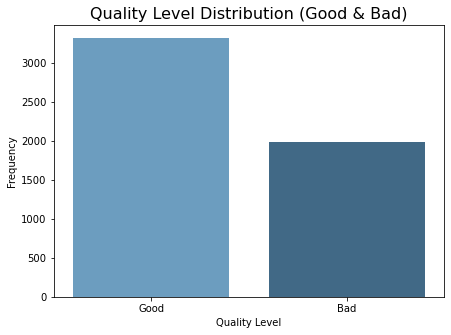

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(x = 'Quality Level', y ="Frequency", data = quality2_df,palette="Blues_d")
plt.title('Quality Level Distribution (Good & Bad)',fontsize=16)
plt.show()

In [37]:
def get_results_binary(clf,clf_name,x_train,y_train,x_test,y_test):
    y_pred = clf.predict(x_test)
    print('Training Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_train, clf.predict(x_train))))    
    print('Test Accuracy('+clf_name+'): {:2.2%}\n'.format(accuracy_score(y_test, clf.predict(x_test))))
    print('Classification Report('+clf_name+'): \n' + classification_report(y_test, y_pred))
        
    print('10 fold Cross Validation('+clf_name+'):')
    cv_accuracy = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print('Accuracy: {:2.2%}'.format(np.mean(cv_accuracy)))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True,cmap='Blues')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix ('+clf_name+')',fontsize=16)
    
    features = X.columns.tolist()
    tmp = pd.DataFrame({'Feature': features, 'Feature Importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature Importance',ascending=False)
    plt.figure(figsize = (10,6))
    plt.title('Features Importance',fontsize=16)
    s = sns.barplot(x='Feature',y='Feature Importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

In [38]:
X = dfb.drop("quality", axis= "columns") # X columns are the independant variables
y = dfb.quality                          # y is dependant variable

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [40]:
rfb = RandomForestClassifier(random_state = 42,                             
                                 min_samples_leaf = 2,
                                 max_depth=7,
                                 n_estimators=200
                            )
rfb.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

Training Accuracy(Random Forest with 2 class Classification): 82.18%
Test Accuracy(Random Forest with 2 class Classification): 75.17%

Classification Report(Random Forest with 2 class Classification): 
              precision    recall  f1-score   support

         Bad       0.69      0.58      0.63       386
        Good       0.78      0.85      0.81       673

    accuracy                           0.75      1059
   macro avg       0.73      0.71      0.72      1059
weighted avg       0.75      0.75      0.75      1059

10 fold Cross Validation(Random Forest with 2 class Classification):
Accuracy: 76.37%


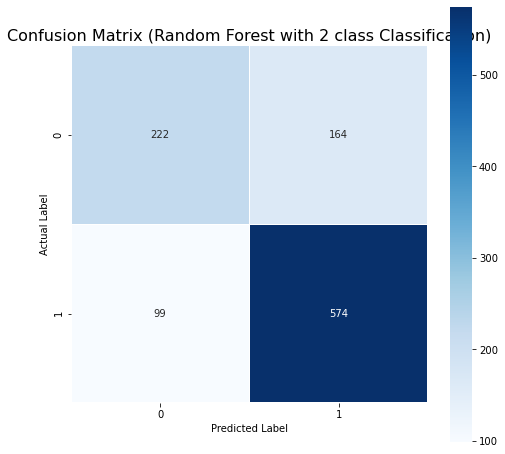

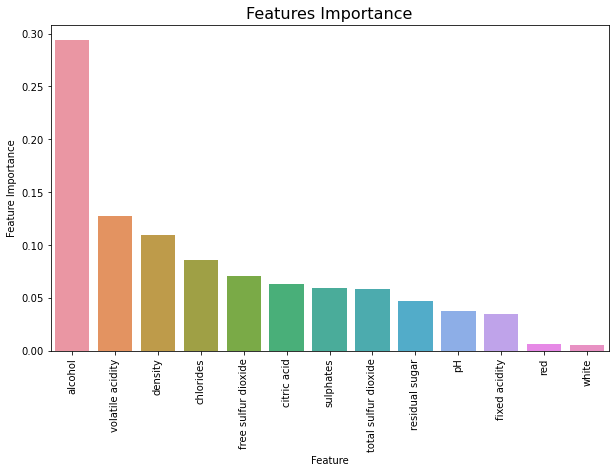

In [41]:
get_results_binary(rfb,'Random Forest with 2 class Classification',X_train,y_train,X_test,y_test)

# CONCLUSION

#### _After all the observation and the 4 models I have the best result is acheived by 3 class Random Forest classification which is 79.37%_